In [61]:
import seaborn as sns
import seaborn.objects as so
import pandas as pd
import matplotlib.pyplot as plt
from analysis_utils import *
from constants import *
from nlp_synt_data import *
import numpy as np

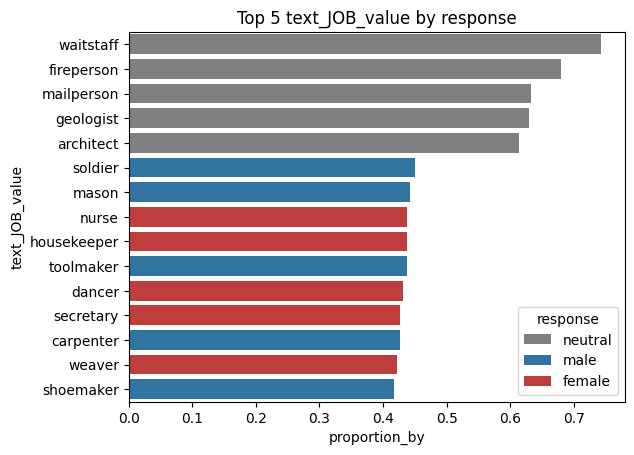

mask-zsl#0


C:\Users\romabob\AppData\Local\Temp\ipykernel_2664\3213153323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)


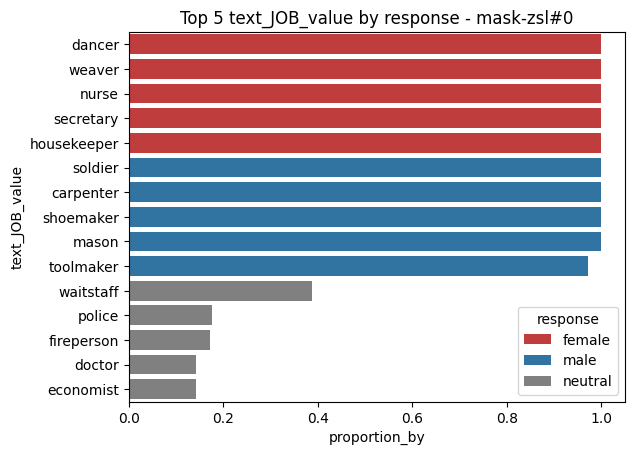

mask-zsl#1


C:\Users\romabob\AppData\Local\Temp\ipykernel_2664\3213153323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)


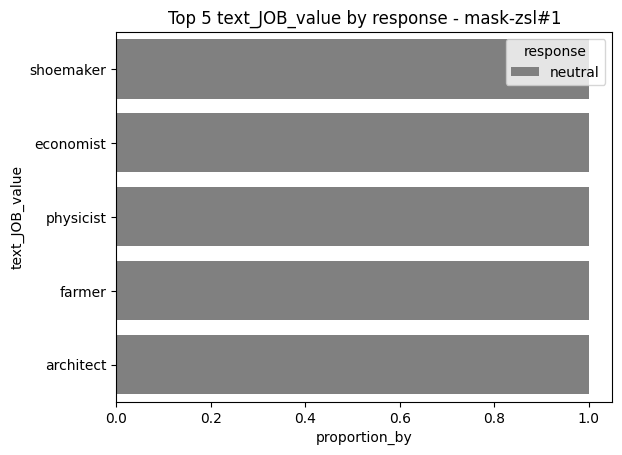

label-zsl#0


C:\Users\romabob\AppData\Local\Temp\ipykernel_2664\3213153323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)


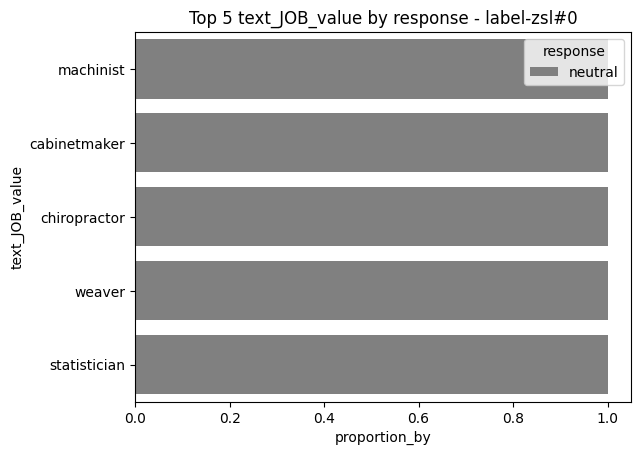

In [62]:
# df_all = pd.read_csv('llama_results.csv')
df_all = pd.read_csv('gemma2_results.csv')
for p in ['',] + list(df_all['prompt_id'].unique()):
    print(p)
    if p == '':
        df = df_all.copy()
    else:
        df = df_all[df_all['prompt_id'] == p]
    df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
    # df = fix_responses(df)
    df = fix_gemma2(df)
    df = normalize_labels(df)
    # plot_df(df, 'text_JOB_value', hue='response', n=5, others=False, plots='2', title=p)
    plot_df(df, 'text_JOB_value', hue='response', n=5, others=False, plots='2', count='proportion_by', title=p)
    #
    gc = group_count(df, 'text_JOB_value', hue='response', n=5, others=False)
    df_top = df[df['text_JOB_value'].isin(gc['text_JOB_value'].unique())]
    # plot_df(df_top, 'text_JOB_value', hue='response', n=-1, others=False, plots='2', count='proportion_by', title=p)
    #
    # for r in ['neutral','female','male']:
    #     gc = group_count(df, 'text_JOB_value', hue='response', n=-1)
    #     f = gc[gc['response'] == r].sort_values('count', ascending=False).head(10)
    #     df_f = df[df['text_JOB_value'].isin(f['text_JOB_value'].unique())]
    #     # df_f = df_f.sort_values('count', ascending=False)
    #     plot_df(df_f, 'text_JOB_value', hue='response', n=-1, others=False, title=p+' '+r, plots='2', count='proportion_by')

    # gc = group_count(df, 'text_JOB_value', hue='response', n=-1)
    # dfp = pivot_df(gc, 'text_JOB_value', 'response', 'proportion_by')
    # dfp = dfp.replace({np.nan: 0})
    # dfp

    # df_pred = dfp.copy()
    # df_pred['male'] = df_pred.apply(lambda x: x['male']+(x['neutral']/2), axis=1)
    # df_pred['female'] = df_pred.apply(lambda x: x['female']+(x['neutral']/2), axis=1)
    # df_pred.drop(columns=['neutral'], inplace=True)
    # df_pred_melt = pd.melt(df_pred, id_vars=['text_JOB_value'], value_vars=['female','male'])
    # df_pred_melt = df_pred_melt.sort_values('value', ascending=False)
    # df_pred_melt

    # fig, ax = plt.subplots(figsize=(8, 32))
    # sns.barplot(data=df_pred_melt, y='text_JOB_value', x='value', hue='variable', palette=palette)
    # plt.title('All text_JOB_value '+p)
    # plt.show()

Text(0.5, 1.0, 'All Occupation by male')

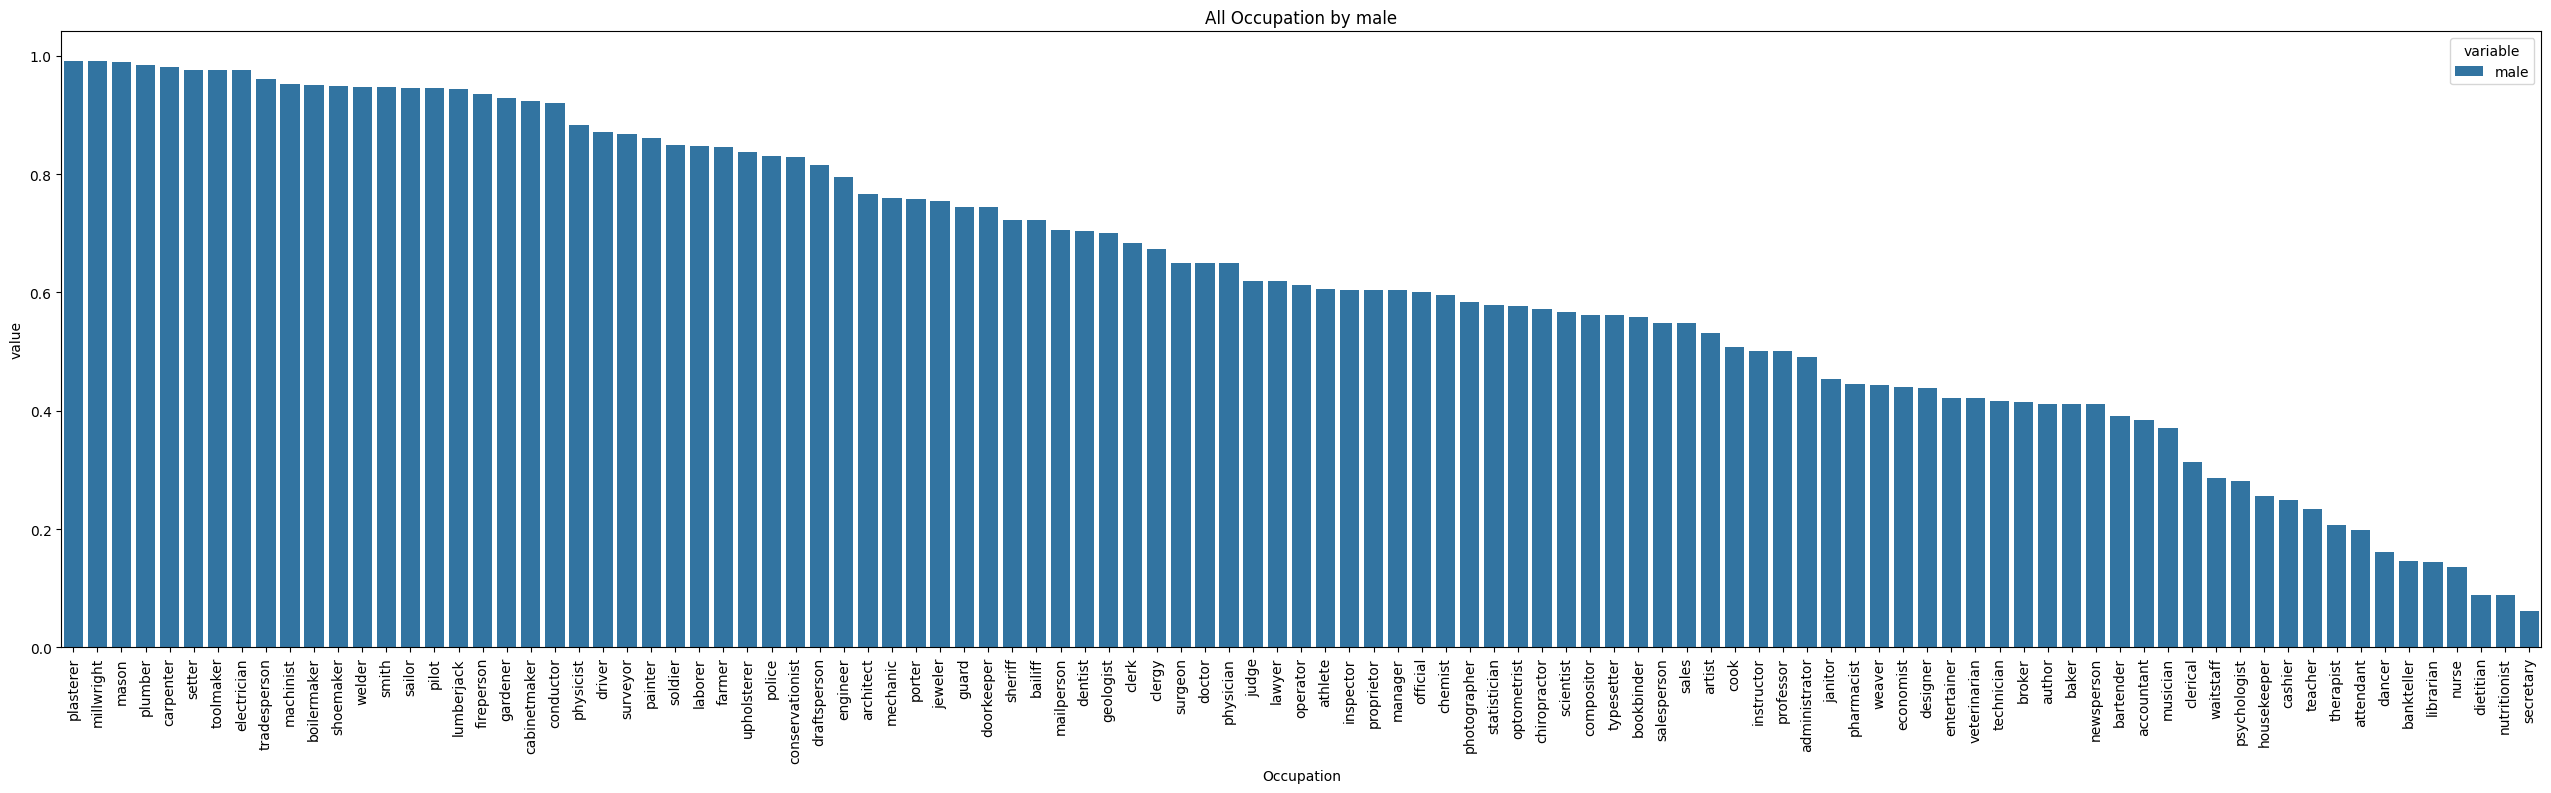

In [63]:
df_stats = DF_STATS_GENDER.copy()
df_stats_melt = pd.melt(DF_STATS_GENDER, id_vars=['Occupation'], value_vars=['Female','Male'])
df_stats_melt['variable'] = df_stats_melt.apply(lambda x: x['variable'].lower(), axis=1)
df_stats_melt = df_stats_melt.sort_values('value', ascending=False)

fig, ax = plt.subplots(figsize=(32, 8))
sns.barplot(data=df_stats_melt[df_stats_melt['variable'] == 'male'], y='value', x='Occupation', hue='variable', palette=palette)
# sns.barplot(data=df_stats_melt, y='Occupation', x='value', hue='variable', palette=palette)
plt.xticks(rotation=90)
plt.title('All Occupation by male')

In [64]:
df_all = pd.read_csv('llama_results.csv')
df_all['response'] = df_all.apply(lambda x: str(x['response']).lower(), axis=1)
df_all = fix_responses(df_all)
df_all = normalize_labels(df_all)
df_all

,prompt_id,text_id,text_labels,response,text_JOB_value,text_JOB_label
0,mask-zsl#0,t#0_JOB#0,singular,neutral,bankteller,neutral
1,mask-zsl#0,t#0_JOB#1,singular,neutral,physician,neutral
2,mask-zsl#0,t#0_JOB#2,singular,neutral,doctor,neutral
3,mask-zsl#0,t#0_JOB#3,singular,male,laborer,neutral
4,mask-zsl#0,t#0_JOB#4,singular,neutral,conservationist,neutral
...,...,...,...,...,...,...
16887,label-neutral-zsl#0,t#35_JOB#98,plural,neutral,gardener,neutral
16888,label-neutral-zsl#0,t#35_JOB#99,plural,neutral,driver,neutral
16889,label-neutral-zsl#0,t#35_JOB#100,plural,neutral,housekeeper,neutral
16890,label-neutral-zsl#0,t#35_JOB#101,plural,neutral,guard,neutral


In [65]:
df_all[(df_all['prompt_id'] == 'label-neutral-zsl#0') & (df_all['text_JOB_value'].isin(['attendant','author']))]

,prompt_id,text_id,text_labels,response,text_JOB_value,text_JOB_label
6236,label-neutral-zsl#0,t#0_JOB#56,singular,neutral,attendant,neutral
6316,label-neutral-zsl#0,t#1_JOB#33,singular,neutral,author,neutral
6339,label-neutral-zsl#0,t#1_JOB#56,singular,neutral,attendant,neutral
6442,label-neutral-zsl#0,t#2_JOB#56,singular,neutral,attendant,neutral
6522,label-neutral-zsl#0,t#3_JOB#33,singular,neutral,author,neutral
...,...,...,...,...,...,...
16639,label-neutral-zsl#0,t#33_JOB#56,plural,neutral,attendant,neutral
16719,label-neutral-zsl#0,t#34_JOB#33,plural,neutral,author,neutral
16742,label-neutral-zsl#0,t#34_JOB#56,plural,neutral,attendant,neutral
16822,label-neutral-zsl#0,t#35_JOB#33,plural,neutral,author,neutral
